# Manual Graph of Thoughts Demo: Sum List with Simulated Language Model
This example shows how to use the `pure_graph_of_thoughts` package for manual graph of operations construction using the simulated Language Model.

The example task `sum_list` (defined in `sum_list.py`) is used.

## Construct Graph of Operations
The graph of operations is constructed.

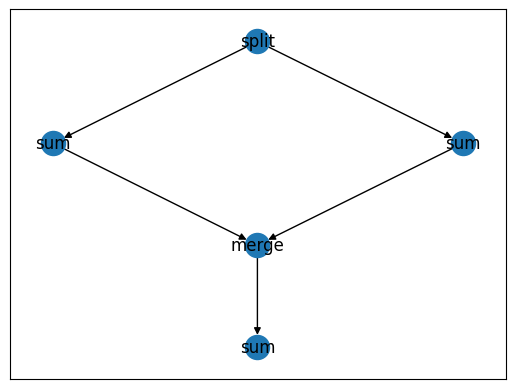

In [1]:
from pure_graph_of_thoughts.api.graph.operation import OperationNode, GraphOfOperations
from pure_graph_of_thoughts.visualization import plot_graph

from auto_graph_of_thoughts.tasks.sum_list import op_split, op_sum, op_merge


def _create_sum_list_graph_of_operations() -> GraphOfOperations:
    source = OperationNode.of(op_split)
    for _ in (1, 2):
        source.append_operation(op_sum)
    aggregate = OperationNode.of(op_merge)
    for branch in source.successors:
        branch.append(aggregate)

    aggregate.append_operation(op_sum)

    return GraphOfOperations.from_source(source)


sum_list_graph_of_operations: GraphOfOperations = _create_sum_list_graph_of_operations()
plot_graph(sum_list_graph_of_operations)

## Execute Graph of Operations
A simulated language model is used as the executing language model.

In [2]:
from auto_graph_of_thoughts.language_model import create_simulated_deterministic_chat_gpt_sum_list
from pure_graph_of_thoughts.controller import CompleteGraphController
import logging
logging.basicConfig(level=logging.INFO)

SEED = 0

ctrl = CompleteGraphController(
    language_model=create_simulated_deterministic_chat_gpt_sum_list(SEED, extra_args={})
)

INFO:CompleteGraphController:Traversing node 760c48c1-2eba-49b2-bf95-ba55641a84f3
INFO:CompleteGraphController:Processing operation PromptOperation(name='split', n_inputs=1, n_outputs=2, type=<OperationType.GENERATE: 'generate'>, output_complexity=Fraction(1, 2))
INFO:CompleteGraphController:Traversing node 74f8e0c5-46af-4b8a-b9f5-8569b9c7f0bd
INFO:CompleteGraphController:Processing operation PromptOperation(name='sum', n_inputs=1, n_outputs=1, type=<OperationType.GENERATE: 'generate'>, output_complexity=1)
INFO:CompleteGraphController:Traversing node 813324e0-99d6-41ed-844f-580ebfcc2487
INFO:CompleteGraphController:Processing operation PromptOperation(name='sum', n_inputs=1, n_outputs=1, type=<OperationType.GENERATE: 'generate'>, output_complexity=1)
INFO:CompleteGraphController:Traversing node 7bd1e4ff-acd4-43d7-bb77-603697c71905
INFO:CompleteGraphController:Processing operation PromptOperation(name='merge', n_inputs=2, n_outputs=1, type=<OperationType.AGGREGATE: 'aggregate'>, output

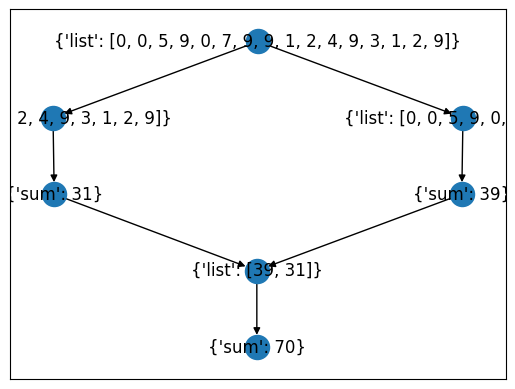

In [3]:
list = [0, 0, 5, 9, 0, 7, 9, 9, 1, 2, 4, 9, 3, 1, 2, 9]
sum_list_graph_of_thoughts = ctrl.execute_graph(sum_list_graph_of_operations, init_state={
    'list': list
})
plot_graph(sum_list_graph_of_thoughts)

The sum is correct.

In [4]:
sum(list)

70